# Logistic Regression

### ?? Apply regularisation if overfitting eg penalty='l1' or 'l2' 
### !! Fix precision, recall etc

### ?? SMOTE
### ?? PCA

## Imports & Functions

In [1]:
# Import typically used packages
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Import plotting packages
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#plt.style.use('default')

## Load Features & Target (X,y) Data

- Feature data has been scaled and encoded and is in a sparse matrix, CSR

In [2]:
import pickle

with open('xy_data.pickle', 'rb') as file:
    X_train, X_test, y_train, y_test = pickle.load(file)

## Model Training & Evaluation

In [3]:
# Create and fit the model

penalty = 'l2'      # L1 or L2 regularisation
solver = 'saga'     # Saga is a variant of Sag. With L1 or l2. Large dataset. liblinear is for small datsets, binary classifications
c = 1.0             # Strength of regularisation, default is 1, smaller is stronger
random_state = 42   # Random seed, default is none
max_iter = 100      # Default is 100
verbose = 1         # Default is 0

log_reg = LogisticRegression(solver='liblinear', penalty='l2')
log_reg.fit(X_train, y_train)

print("Test Accuracy =",log_reg.score(X_test, y_test))


Test Accuracy = 0.8257994472956968


In [4]:
log_reg_2 = LogisticRegression(solver='saga', penalty='l1', max_iter=500)
log_reg_2.fit(X_train, y_train)

print("Test Accuracy =",log_reg_2.score(X_test, y_test))

Test Accuracy = 0.825996841689696


In [5]:
# k-fold Cross Validation

cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f} with SD of {np.std(cv_scores):.4f}")
print(cv_scores)

Mean CV accuracy: 0.8195 with SD of 0.0012
[0.81914631 0.81877622 0.81803602 0.8197409  0.82171499]


In [6]:
cv_scores = cross_val_score(log_reg_2, X_train, y_train, cv=5, scoring='accuracy')
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f} with SD of {np.std(cv_scores):.4f}")
print(cv_scores)

Mean CV accuracy: 0.8200 with SD of 0.0013
[0.82000987 0.81939304 0.81803602 0.82060457 0.82208513]


In [7]:
y_pred = log_reg.predict(X_test)


Accuracy: 0.8257994472956968
Precision: 0.6450079239302694
Recall: 0.20893223819301848
F1 Score 0.31562621170996513
Specificity: 0.9726295210166178
Hamming Loss 0.1742005527043032
ROC-AUC Score 0.7460238500625249


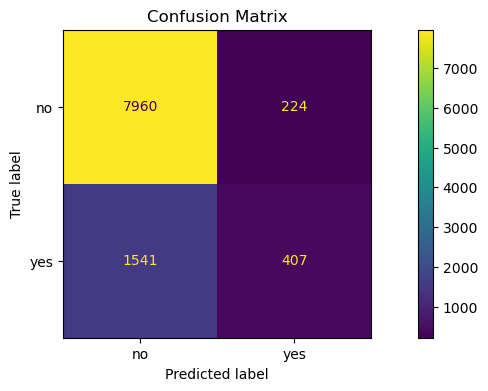

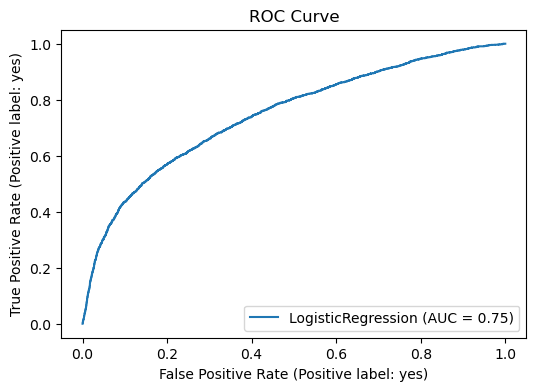

In [8]:
plt.style.use('default')

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Print various metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'Precision: {metrics.precision_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
print(f'Recall: {metrics.recall_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
print(f'F1 Score {metrics.f1_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
print(f'Specificity: {tn / (tn + fp)}')
print(f'Hamming Loss {metrics.hamming_loss(y_true=y_test, y_pred=y_pred)}')


# Plot Confusion Matrix
class_labels = log_reg.classes_
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(ax=ax)
plt.show

# Plot the ROC curve
y_probabilities = log_reg.predict_proba(X_test)[:, 1]
print(f'ROC-AUC Score {metrics.roc_auc_score(y_true=y_test, y_score=y_probabilities)}')
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('ROC Curve')
roc_display = RocCurveDisplay.from_estimator(log_reg, X_test, y_test, ax=ax, pos_label="yes")
plt.show()

plt.style.use('ggplot')


## Previous

In [9]:
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), params, cv=5)
grid.fit(X_train, y_train)
print(f"Optimal λ: {grid.best_params_}")
best_score = grid.best_score_
print(f'Best score: {best_score}')

Optimal λ: {'C': 100, 'penalty': 'l2'}
Best score: 0.8197296219904283


In [10]:
all_scores = grid.cv_results_['mean_test_score']
a_results_df = pd.DataFrame(grid.cv_results_)


In [22]:
params = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 50], 'penalty': ['l1', 'l2'], 'max_iter': [1000]}
grid = GridSearchCV(LogisticRegression(solver='saga'), params, cv=5)
grid.fit(X_train, y_train)
print(f"Optimal λ: {grid.best_params_}")

Optimal λ: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


In [ ]:
#eg
params = {
    'solver': ['saga'],  # Only solver supporting both penalties
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 5, 10, 50],
    'max_iter': [1000]
}

In [ ]:
# eg
param_grid = [
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 5, 10, 50]
    },
    {
        'solver': ['lbfgs', 'newton-cg'],
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 5, 10, 50]
    }
]
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)

In [ ]:
X_test_encoded = col_transform.transform(X_test)
display(X_test_encoded.shape)


In [ ]:
print("Test Accuracy =",log_reg.score(X_test_encoded, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = log_reg.predict(X_test_encoded)
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
plt.style.use('default')

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Print various metrics
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred=y_pred)}')
print(f'Precision: {metrics.precision_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
#print(f'Recall: {metrics.recall_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
#print(f'F1 Score {metrics.f1_score(y_true=y_test, y_pred=y_pred, pos_label="yes")}')
print(f'Specificity: {tn / (tn + fp)}')
print(f'Hamming Loss {metrics.hamming_loss(y_true=y_test, y_pred=y_pred)}')


# Plot Confusion Matrix
class_labels = log_reg.classes_
fig, ax = plt.subplots(figsize=(12,4))
ax.set_title('Confusion Matrix')
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels).plot(ax=ax)
plt.show

# Plot the ROC curve
y_probabilities = log_reg.predict_proba(X_test_encoded)[:, 1]
print(f'ROC-AUC Score {metrics.roc_auc_score(y_true=y_test, y_score=y_probabilities)}')
fig, ax = plt.subplots(figsize=(6,4))
ax.set_title('ROC Curve')
roc_display = RocCurveDisplay.from_estimator(log_reg, X_test_encoded, y_test, ax=ax, pos_label="yes")
plt.show()

## Decision Tree

In [ ]:
# import decision tree from sklearn
from sklearn import tree

# create and train the model
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train_encoded, y_train)

In [ ]:
# import cross validation function
from sklearn.model_selection import cross_val_score

# Now, compute scores for the 5 folds (this makes 5 seperate models, and tests them 
# each on a different 0.2 of the data set- returning a list of these scores).
cv_scores = cross_val_score(tree_clf, X_train_encoded, y_train, cv=5)

# print the mean of the list of scores
print("cv_scores mean: {}".format(np.mean(cv_scores)))

In [ ]:
tree.plot_tree(tree_clf); # could just call this on its own to display the tree here

# these lines will save the tree so you can view it outside the browser
import matplotlib.pyplot as plt
plt.savefig('tree.svg',format='svg',bbox_inches = "tight")

In [ ]:
# make some predictions on unseen data
y_pred = tree_clf.predict(X_test)

# calculate accuracy of the predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

## TBD

In [ ]:
# Analysis to identify features desired
correlation_matrix = customers_cleaned.corr(numeric_only=True)
display(correlation_matrix)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Possible need to encode the target 
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
# Can SMOTE help eg

from imblearn.over_sampling import SMOTE

X_resampled, y_resampled = SMOTE().fit_resample(X, y)